In [23]:
# Basic Imports
import warnings  # Warning control
warnings.filterwarnings('ignore')

# Data Manipulation
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation and analysis

# Data Visualization
import matplotlib.pyplot as plt  # Plotting and visualization
import seaborn as sns  # Statistical data visualization

# Modelling
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Linear models
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors Regressor
from sklearn.tree import DecisionTreeRegressor  # Decision Tree Regressor
from sklearn.svm import SVR  # Support Vector Regressor
from sklearn.model_selection import RandomizedSearchCV  # Hyperparameter tuning

# Data Preprocessings
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Data preprocessing
from sklearn.compose import ColumnTransformer  # Combining transformers
from sklearn.model_selection import train_test_split

# Ensemble Methods
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor  # Ensemble methods
from catboost import CatBoostRegressor  # CatBoost Regressor
from xgboost import XGBRegressor  # XGBoost Regressor

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Model evaluation metrics


In [15]:
df = pd.read_csv('data/cleaned_dataset.csv')

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_scores,average_scores
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
X = df.drop(columns=['total_scores'],axis=1)

X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_scores
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [17]:
y = df['total_scores']

y

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_scores, Length: 1000, dtype: int64

In [20]:
numeric_features = X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='object').columns

encoder = OneHotEncoder()
scaler = StandardScaler()

preprocessor = ColumnTransformer([
    ('OneHotEncoder',encoder,categorical_features),
    ('StandardScaler',scaler,numeric_features)
])

In [21]:
X = preprocessor.fit_transform(X)

In [22]:
X.shape

(1000, 21)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(700, 21) (300, 21) (700,) (300,)


In [25]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0277
- Mean Absolute Error: 0.8232
- R2 Score: 0.9994
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1227
- Mean Absolute Error: 0.8870
- R2 Score: 0.9994


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0202
- Mean Absolute Error: 0.0163
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0221
- Mean Absolute Error: 0.0173
- R2 Score: 1.0000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.9939
- Mean Absolute Error: 4.6086
- R2 Score: 0.9792
-----------------------

In [27]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,1.000000
1,Lasso,0.999379
4,Decision Tree,0.998127
5,Random Forest Regressor,0.996725
6,XGBRegressor,0.996039
7,CatBoosting Regressor,0.994527
8,AdaBoost Regressor,0.988149
3,K-Neighbors Regressor,0.967808


In [28]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


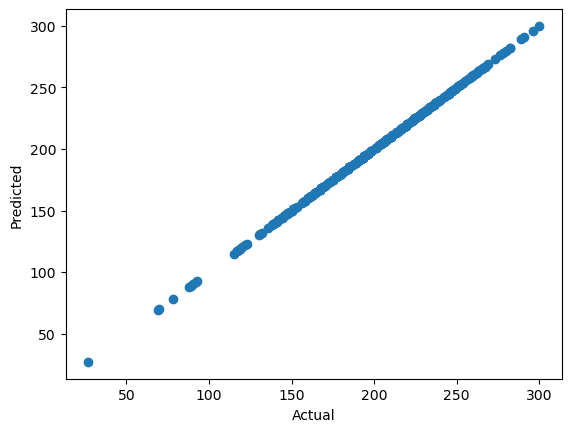

In [29]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

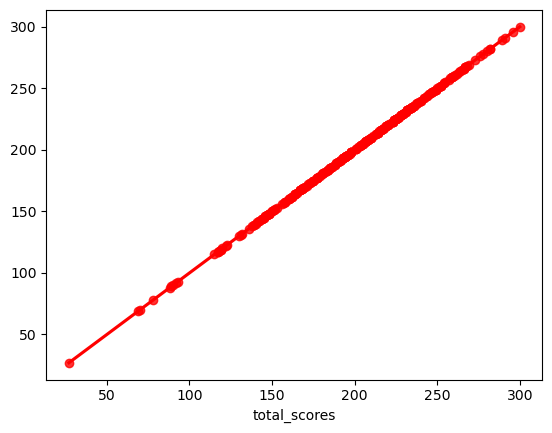

In [30]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');